# E-commerce Data Analysis

**About data**

Dataset ini disediakan dengan cuma-cuma oleh Olist, toko serba ada terbesar di pasar Brasil. Olist menghubungkan usaha kecil dari seluruh Brasil ke saluran tanpa kerumitan dan dengan satu kontrak. Para pedagang tersebut dapat menjual produk mereka melalui Olist Store dan mengirimkannya langsung ke pelanggan menggunakan mitra logistik Olist.

Setelah pelanggan membeli produk dari Olist Store, penjual akan diberi tahu untuk memenuhi pesanan tersebut. Setelah pelanggan menerima produk, atau perkiraan tanggal pengiriman, pelanggan akan mendapatkan survei kepuasan melalui email di mana ia dapat memberikan catatan untuk pengalaman pembelian dan menuliskan beberapa komentar.

Database ini terdiri dari delapan buah tabel, antara lain customers, orders, products, geolocation, payments, category, review, dan sellers.


1. Tabel customers: tabel ini menyimpan berbagai informasi terkait customer.
2. Tabel orders: tabel ini menyimpan berbagai informasi terkait sebuah order.
3. Tabel products: tabel ini berisi berbagai informasi terkait sebuah produk.
5. Tabel paymets: tabel ini berisi berbagai informasi mengenai payments yang dilakukan oleh customer.
6. Tabel review: tabel ini menyimpan informasi survei kepuasan pelanggan.
7. Tabel order_items : tabel ini menyimpan informasi mengenai barang yang di order oleh customers.









**Pertanyaan Bisnis / Permasalahan**


* Bagaimana demografi Pelanggan yang dimiliki ?
* kategori produk apa yang paling banyak dan paling sedikit terjual?
* Berapa banyak uang yang dihabiskan pelanggan ?
* bagaimana nilai kepuasan pelanggan setelah melakukan transaksi ?





**Tujuan**


* Mengatahui demografi Pelanggan yang dimiliki
* Mengatahui kategori produk apa yang paling banyak dan paling sedikit terjual
* Mengatahui banyaknya uang yang dihabiskan pelanggan
* Mengatahui kepuasan pelanggan setelah melakukan transaksi





## Menyiapkan Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## Data Wrangling

### Data Gathering

In [2]:
#load customer dataset

customers_df = pd.read_csv("https://raw.githubusercontent.com/Rifanuraa/e-commerce-public-data-analysis/main/data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
#load product dataset

products_df = pd.read_csv('https://raw.githubusercontent.com/Rifanuraa/e-commerce-public-data-analysis/main/data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [4]:
#load orders_items dataset

orders_item_df = pd.read_csv("https://raw.githubusercontent.com/Rifanuraa/e-commerce-public-data-analysis/main/data/order_items_dataset.csv")
orders_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
#load orders dataset

orders_df = pd.read_csv("https://raw.githubusercontent.com/Rifanuraa/e-commerce-public-data-analysis/main/data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
#load payments dataset
payments_df = pd.read_csv("https://raw.githubusercontent.com/Rifanuraa/e-commerce-public-data-analysis/main/data/order_payments_dataset.csv")
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
#load reviews data set
reviews_df = pd.read_csv("https://raw.githubusercontent.com/Rifanuraa/e-commerce-public-data-analysis/main/data/order_reviews_dataset.csv")
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


## *Assecing Data*

### *Menilai tabel `customers_df`*

In [8]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [9]:
customers_df.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [10]:
customers_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

dalam tabel `customers_df` tidak ada missing value

In [11]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


dalam tabel customers_df tidak ada duplicate value

In [12]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [13]:
# geolocation_df.info()

In [14]:
# geolocation_df.isnull().sum()

In [15]:
# print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

tabel geolocation memiliki **261831** data duplikat

### menilai `products_df`

In [16]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [17]:
products_df.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [18]:
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [19]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [20]:
products_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
26724,cd1db0c97e4b3644bb52432611e09c58,moveis_decoracao,52.0,583.0,2.0,30000.0,88.0,45.0,41.0
585,b687f7d54b34a215172bf55f9584584a,ferramentas_jardim,49.0,374.0,1.0,900.0,30.0,10.0,20.0
18483,69f07c49379a0c4bd660dd794a72f02a,cool_stuff,47.0,1793.0,10.0,925.0,20.0,41.0,15.0
30820,43a888fc6acdffc23011578f63d5f045,moveis_decoracao,63.0,308.0,2.0,1200.0,30.0,30.0,30.0
27969,a300dd822c0e15dd16ecc317522eefcf,informatica_acessorios,55.0,579.0,1.0,150.0,16.0,11.0,11.0


### Menilai tabel `order_items_df`

In [21]:
orders_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [22]:
orders_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [23]:
orders_item_df.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [24]:
print("Jumlah duplikasi: ", orders_item_df.duplicated().sum())

orders_item_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### Menilai tabel `orders_df`

In [25]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


order_delivered_carrier_date   
order_delivered_customer_date  
order_estimated_delivery_date  

data type object seharusnya datetime


In [26]:
orders_df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [27]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [28]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### Menilai tabel `payment`

In [29]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [30]:
payments_df.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

In [31]:
payments_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [32]:
print("Jumlah duplikasi: ", payments_df.duplicated().sum())

payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### Menilai tabel `reviews`

In [33]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [34]:
reviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

## Data Cleaning

Setelah dilakukan assecing data, dilakukan data cleaning agar data dapat digunaka untuk dianalisis. Dari penilaian data yang telah dilakukan ditemukan beberapa kejanggalan dalam data yang perlu diperbaiki berikut beberapa hal yang akan dilakukan dalam data cleaning ini.

1. tabel customer : menyamakan value pada kolom geolocation_city.
2. product_df : mengisi missing value pada category name dengan kategori 'others', drop kolom name_lenght, description, photos. Serta menyedaerhanakan data mengubah pemisah `_` dalam kolom product_category_name menjadi pemisah dengan spasi.
3. tabel orders : order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date terdeteksi sebagai data type object sehingga akan di ubah menjadi datetime, dan menghapus missing value.
4. tabel reviews : menghapus kolom review_comment_title,review_comment_message,	review_creation_date, karena tidak akan  dan untuk menyederhanakan data.

### membersihkan tabel `customers_df`

#### menghapus duplicates

#### Menyamakan Value

In [35]:
customers_df.customer_city.unique()

array(['franca', 'sao bernardo do campo', 'sao paulo', ...,
       'monte bonito', 'sao rafael', 'eugenio de castro'], dtype=object)

'sao paulo' dan 'são paulo' merupakan satu kota yang sama namun terdapat perbadaan penulisan maka dari itu, akan dilakukan penyamaan cara penulisan/value

In [36]:
import re

pattern = 'são paulo'
customers_df['customer_city'] = customers_df['customer_city'].str.replace(pattern, 'sao paulo', regex=True)

### Membersihkan Tabel `product_df`

#### drop kolom yang tidak akan diunakan

In [37]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [38]:
products_df.drop(columns=['product_name_lenght',	'product_description_lenght',	'product_photos_qty'], inplace=True)

products_df.head(3)


,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,18.0,9.0,15.0


#### Mengisi missing value

In [39]:
products_df["product_category_name"].fillna("others", inplace = True)

products_df.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,20.0,17.0,13.0


In [40]:
#mengecek kembali missing value pada products_df

products_df.isnull().sum()

product_id               0
product_category_name    0
product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
dtype: int64

Karena masih terdapat missing value pad kolom lenght,height,width,weight. sedangkan yang kosong tidak dapat kita isi,dan dicari maka null value pada kolom tersebut akan di hapus dengan menggunakan metode dropna()

In [41]:
products_df = products_df.dropna()

In [42]:
#mengecek kembali missing value pada products_df

products_df.isnull().sum()

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

#### Menggantikan tanda hubung _ dengan spasi

In [43]:
products_df['product_category_name'] = products_df['product_category_name'].str.replace("_", " ")
products_df.sample(5)

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
4831,35675af4fd3065f5e56b6d609ae385f5,cama mesa banho,900.0,50.0,16.0,16.0
1555,601a360bd2a916ecef0e88de72a6531a,cool stuff,1600.0,42.0,25.0,15.0
16871,a7789acddff06105fcfd8a56e0f12307,relogios presentes,507.0,18.0,11.0,15.0
28638,5cfad4d334cce4266bd2a51c2111f98f,telefonia,175.0,18.0,3.0,12.0
12549,191f3eac7d624242f8eec11e472b877a,moveis decoracao,5900.0,47.0,37.0,38.0


### Membersihkan Tabel `orders_df`

#### Menghapus missing value

In [44]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [45]:
orders_df.dropna(inplace=True)

In [46]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### mengubah tipe object mejadi datetime

pada tahap ini dilakukan update datatyype yuang tidak seharusnya menjadi tipe data yang seharusnya. dalam kasus ini terdapat tipe data yang kurang tepat pada tabel orders_df dan reviews_df, sehinggga akan dilakukan convert atau pengubahan dari tipe data obejct menjadi date time dengan menggunakan `astype()`

In [47]:
orders_df[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_purchase_timestamp', 'order_estimated_delivery_date']] = orders_df[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date','order_purchase_timestamp', 'order_estimated_delivery_date']].astype('datetime64[ns]')

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 8.6+ MB


In [48]:
reviews_df.head( )

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [49]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [50]:
reviews_df[['review_creation_date', 'review_answer_timestamp']] = reviews_df[['review_creation_date', 'review_answer_timestamp']].astype('datetime64[ns]')

In [51]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


#### Menggantikan tanda '_' dengan ' ' spasi

In [52]:
# Replace all occurrences of 2 in 'col1' with 20
products_df['product_category_name'] = products_df['product_category_name'].str.replace('_', ' ')

products_df.sample(5)


,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
6842,95f76a3205f55d54b001e730486c6737,cama mesa banho,17800.0,58.0,40.0,50.0
28458,72c4031dab551c0441689706d58957a1,fashion calcados,200.0,29.0,7.0,16.0
8998,67c4868694e75a87d7d0417c14fc26a3,others,400.0,16.0,16.0,13.0
21952,c1c1d3afbe6a5ab7a534f7ea20e09b8e,esporte lazer,203.0,20.0,14.0,14.0
5362,60b8232efc6b30822171dff08d6c439f,automotivo,2133.0,17.0,15.0,17.0


In [53]:
products_df.dropna(inplace=True)

In [54]:
products_df.isnull().sum()

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

### Membersihakan Tabel `reviews_df`

In [55]:
reviews_df.sample()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
62392,aed16082f275e17a2d85693d0f971d0e,a9957adf297a6be5e8625b3e93329c6d,1,NaN,"Não recebi meu pedido, e não é a primeira vez ...",2017-03-24,2017-04-03 23:42:55


In [56]:
reviews_df.drop(columns=['review_comment_title','review_comment_message',	'review_creation_date'], inplace=True)

reviews_df.sample()

,review_id,order_id,review_score,review_answer_timestamp
73624,094cf20123c693fc21585c34886ef2c5,4b7c1bc59d4ec725d8530c19ec09b06f,4,2017-02-09 09:14:27


## Exploratory Data Analysis

**Pertanyaan Bisnis / Permasalahan**

* Bagaimana demografi Pelanggan yang dimiliki ?
* kategori produk apa yang paling banyak dan paling sedikit terjual?
* Berapa banyak uang yang dihabiskan pelanggan ?
* bagaimana nilai kepuasan pelanggan setelah melakukan transaksi ?

### Explorasi Tabel `customers_df`

In [57]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [58]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [59]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

Kota yang paling sering muncul atau kota yang memimliki pelanggan terbanyak yaitu kota **Sao Paulo** dan untuk negara bagian yaitu **SP** atau **Sao Paoulo**

### Eksplorasi tabel `products_df`

In [60]:
products_df.describe(include="all")

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949,32949,32949.000000,32949.000000,32949.000000,32949.000000
unique,32949,74,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama mesa banho,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN
mean,NaN,NaN,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,1900.000000,38.000000,21.000000,30.000000


In [61]:
# Menghitung jumlah value dengan fungsi count
jumlah = products_df['product_category_name'].value_counts()['cama mesa banho']

# Mencetak hasil
print(f"Jumlah value {'cama mesa banho'} dalam kolom {'product_category_name'}: {jumlah}")


Jumlah value cama mesa banho dalam kolom product_category_name: 3029


**cama mesa banho** merupakan kategori produk yang paling banyak dimiliki, dengan jumlah 3029 produk.

### Explore Tabel `orders_item_df`




In [62]:
orders_item_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


berdasarkan hasil tersebut, dapat diketahui bahwa rata-rata harga dari item sebesar **120** dengan nilai maksimum **6735** dan nilai minimum sebesar **0.85**

### Eksplor Tabel `products_df` dan  `orders_item_df`

In [63]:
orders_products_df = pd.merge(
    left=orders_item_df ,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
orders_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool stuff,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet shop,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis decoracao,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas jardim,3750.0,35.0,40.0,30.0


In [64]:
orders_products_df.groupby(by="product_category_name").agg({
    "product_id": "nunique",
    "price": "sum"
})

,product_id,price
product_category_name,,
agro industria e comercio,74,72530.47
alimentos,82,29393.41
alimentos bebidas,104,15179.48
artes,55,24202.64
artes e artesanato,19,1814.01
...,...,...
sinalizacao e seguranca,93,21509.23
tablets impressao imagem,9,7528.41
telefonia,1134,323667.53


In [65]:
orders_products_df.groupby(by="product_category_name").agg({
    "product_id": "count",
    "price": "sum"
}).sort_values(by="price", ascending=False)

,product_id,price
product_category_name,,
beleza saude,9670,1258681.34
relogios presentes,5991,1205005.68
cama mesa banho,11115,1036988.68
esporte lazer,8641,988048.97
informatica acessorios,7827,911954.32
...,...,...
flores,33,1110.04
casa conforto 2,30,760.27
cds dvds musicais,14,730.00


penjualan dengan harga tertinggi yaitu produk dengan kategori **beleza saude dengan** total penjualan	**1258681**

### Eksplor tabel `orders_df`

In [66]:
orders_df.describe(include='all')

<ipython-input-66-caf441259110>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include='all')
<ipython-input-66-caf441259110>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include='all')
<ipython-input-66-caf441259110>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include='all')
<ipython-input-66-caf441259110>:1: FutureWarni

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461,96461,96461,96461
unique,96461,96461,2,95939,88272,80100,95649,445
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96455,3,9,47,3,507
first,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
last,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


In [67]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [68]:
orders_df.describe(include='all')

<ipython-input-68-caf441259110>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include='all')
<ipython-input-68-caf441259110>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include='all')
<ipython-input-68-caf441259110>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include='all')
<ipython-input-68-caf441259110>:1: FutureWarni

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,96461,96461,96461,96461,96461,96461,96461,96461,96461.000000
unique,96461,96461,2,95939,88272,80100,95649,445,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00,NaN
freq,1,1,96455,3,9,47,3,507,NaN
first,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,NaN
last,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.292429
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.777252
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-16.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000


Berdasarkan hasil tersebut, dapat diketahui bahwa rata-rata waktu pengiriman sebesar 9 hari dengan nilai maksimum sebesar 205 hari dan nilai minimum sebesar kurang dari 1 hari.

### Eksplor tabel `orders_df` dan `orders_item_df`

In [69]:
orders_and_item_df = pd.merge(
    left=orders_item_df ,
    right=orders_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_and_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,8.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,6.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,13.0


### Eksplorasi Tabel `payments_df`

In [70]:
payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


### Eksplorasi Tabel `reviews_df`

In [71]:
reviews_df.describe(include='all')

<ipython-input-71-6de5ff885a14>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  reviews_df.describe(include='all')


,review_id,order_id,review_score,review_answer_timestamp
count,99224,99224,99224.000000,99224
unique,98410,98673,NaN,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,2017-06-15 23:21:05
freq,3,3,NaN,4
first,NaN,NaN,NaN,2016-10-07 18:32:28
last,NaN,NaN,NaN,2018-10-29 12:27:35
mean,NaN,NaN,4.086421,NaN
std,NaN,NaN,1.347579,NaN
min,NaN,NaN,1.000000,NaN
25%,NaN,NaN,4.000000,NaN


In [72]:
reviews_df["review_score"].mode()

0    5
Name: review_score, dtype: int64

Berdasarkan hasil tersebut, dapat diketahui bahwa rata-rata penilaian yang diberikan yaitu 4 dari 5 dengan nilai maksimum sebesar 5 dari 5 dan nilai minimum sebesar 1 dari 5.

In [73]:
all_order_df = pd.merge(
    left=orders_products_df ,
    right=orders_and_item_df,
    how="left",
    on=["order_id", "order_item_id","seller_id","price", "freight_value", "product_id","shipping_limit_date" ]
)
all_order_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool stuff,650.0,28.0,9.0,14.0,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet shop,30000.0,50.0,30.0,40.0,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,8.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis decoracao,3050.0,33.0,13.0,33.0,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,6.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,200.0,16.0,10.0,15.0,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas jardim,3750.0,35.0,40.0,30.0,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,13.0


In [74]:
all_df = pd.merge(
    left=all_order_df ,
    right=reviews_df,
    how="left",
    on= "order_id"
    # right_on=[["order_id", "order_item_id","seller_id","price", "freight_value"]]
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,review_id,review_score,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool stuff,650.0,28.0,...,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1.0,97ca439bc427b48bc1cd7177abe71365,5.0,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet shop,30000.0,50.0,...,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,8.0,7b07bacd811c4117b742569b04ce3580,4.0,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis decoracao,3050.0,33.0,...,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,6.0,0c5b33dea94867d1ac402749e5438e8b,5.0,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,200.0,16.0,...,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,4.0,f4028d019cb58564807486a6aaf33817,4.0,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas jardim,3750.0,35.0,...,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,13.0,940144190dcba6351888cafa43f3a3a5,5.0,2017-03-03 10:54:59


## Data Visualisasi


**Pertanyaan Bisnis / Permasalahan**

* Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
* Bagaimana demografi Pelanggan yang dimiliki ?
* kategori produk apa yang paling banyak dan paling sedikit terjual?
* Berapa banyak uang yang dihabiskan pelanggan ?
* bagaimana nilai kepuasan pelanggan setelah melakukan transaksi ?

### Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir ?

In [75]:
orders_and_item_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'delivery_time'],
      dtype='object')

In [76]:
monthly_orders_df = orders_and_item_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
monthly_orders_df.head()

,order_purchase_timestamp,order_count,revenue
0,2016-09,1,134.97
1,2016-10,270,40941.30
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,748,111712.47


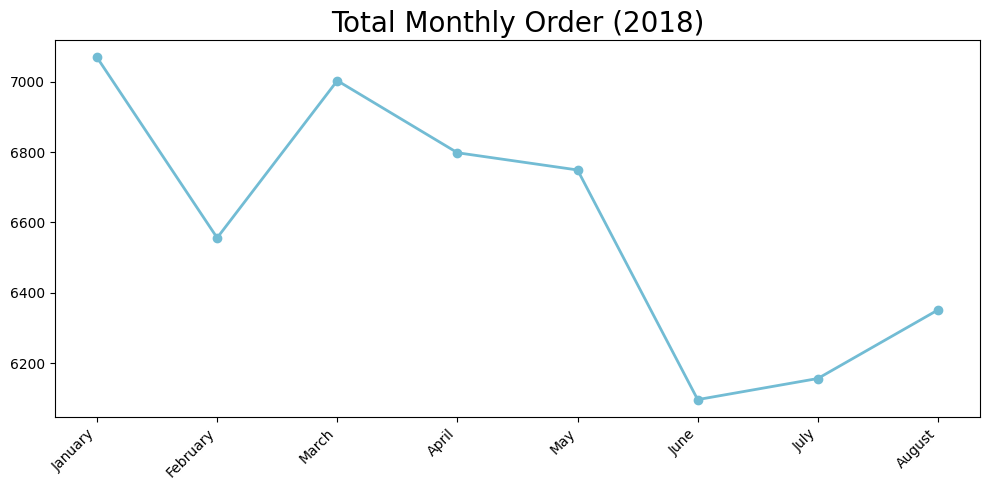

In [77]:
filtered_df = orders_and_item_df[orders_and_item_df['order_purchase_timestamp'].dt.year == 2018]

monthly_orders_df = filtered_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",  # Count unique orders
    "price": "sum"  # Calculate total revenue
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%B')  # Month name
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "Order Count",
    "price": "revenue"
}, inplace=True)


plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_purchase_timestamp"], monthly_orders_df["Order Count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Total Monthly Order (2018)", loc="center", fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


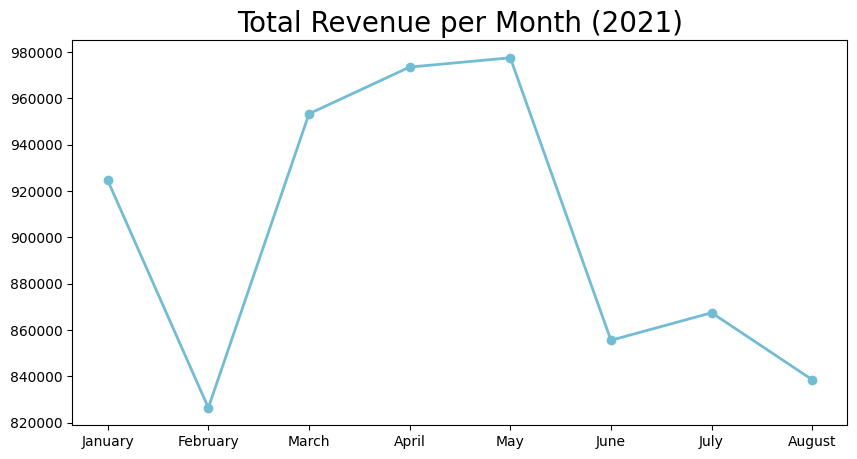

In [78]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Bagaimana demografi Pelanggan yang dimiliki ?

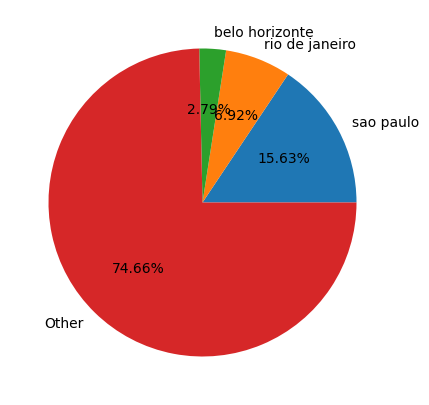

In [79]:
# Menghitung banyaknya wisatawan dari setiap kota
customer_loc = customers_df['customer_city'].value_counts()

# Mengambil 5 kota asal dari wisatawan yang terbanyak
top_customer_loc = customer_loc.sort_values(ascending=False)[:3]

# Menyederhanakan kota lain sebagai 'Other'
top_customer_loc['Other'] = customer_loc.sort_values(ascending=False)[3:].sum()

# Mengatur ukuran chart yang dibuat
plt.figure(figsize=(5,5))

# Membuat pie chart dengan library matplotlib
plt.pie(top_customer_loc, labels=top_customer_loc.index, autopct='%2.2f%%')

# Menampilkan pie chart yang telah dirancang
plt.show()

In [80]:
customers_df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

<ipython-input-81-a77d158cdd82>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-81-a77d158cdd82>:9: UserWarning: 
The palette list has fewer values (8) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


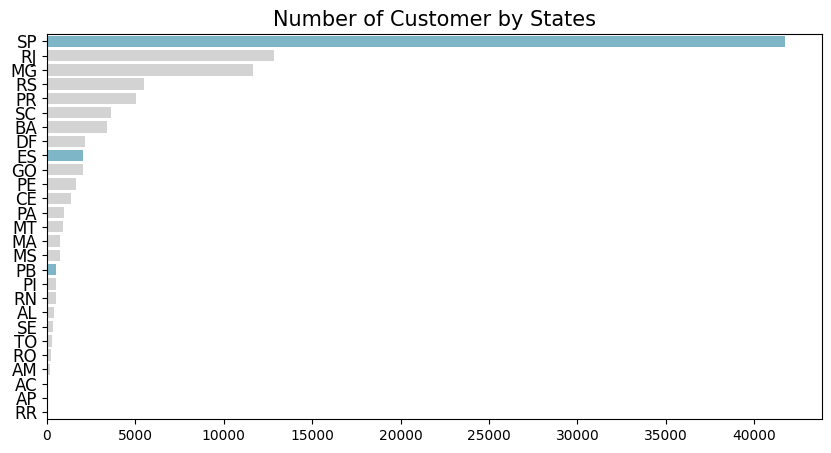

In [81]:
bystate_df = customers_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count",
    "customer_state" : "state"
}, inplace=True)
bystate_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count",
    y="state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### kategori produk apa yang paling banyak dan paling sedikit terjual?

In [82]:
orders_products_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],
      dtype='object')

In [83]:
sum_order_items_df = orders_products_df.groupby("product_category_name").order_id.count().sort_values(ascending=False).reset_index()
sum_order_items_df.rename(columns={
    "order_id": "order count",
    "product_category_name": "category name"
}, inplace=True)
sum_order_items_df.head(10)

,category name,order count
0,cama mesa banho,11115
1,beleza saude,9670
2,esporte lazer,8641
3,moveis decoracao,8334
4,informatica acessorios,7827
5,utilidades domesticas,6964
6,relogios presentes,5991
7,telefonia,4545
8,ferramentas jardim,4347
9,automotivo,4235


<ipython-input-84-a845b6cdf28b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order count", y="category name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
<ipython-input-84-a845b6cdf28b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order count", y="category name", data=sum_order_items_df.sort_values(by="order count", ascending=True).head(5), palette=colors, ax=ax[1])


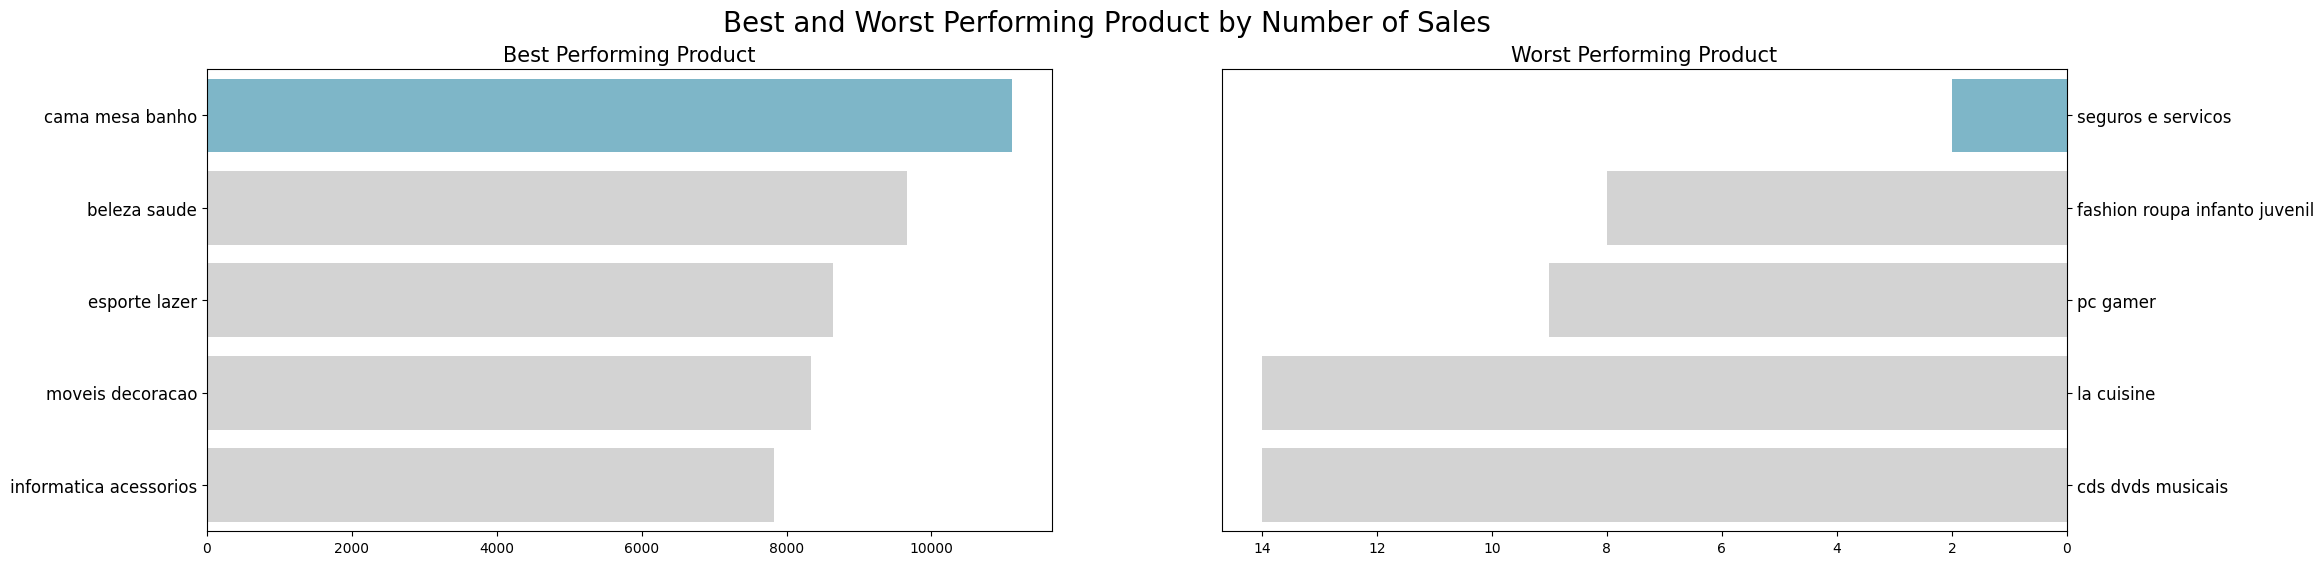

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order count", y="category name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="order count", y="category name", data=sum_order_items_df.sort_values(by="order count", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

### Berapa banyak uang yang dihabiskan pelanggan ?

In [85]:
all_order_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'delivery_time'],
      dtype='object')

In [86]:
price_df = all_order_df.groupby(by="customer_id").agg({
    "order_purchase_timestamp": "max",
    "order_id": "count",
    "price": "sum"
}).sort_values(by="price", ascending=False)

price_df.columns = [ "max_order_timestamp", "frequency","monetary"]
price_df.head()

,max_order_timestamp,frequency,monetary
customer_id,,,
1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,8,13440.0
ec5b2ba62e574342386871631fafd3fc,2018-07-15 14:49:44,4,7160.0
c6e2731c5b391845f6800c97401a43a9,2017-02-12 20:37:36,1,6735.0
f48d464a0baaea338cb25f816991ab1f,2018-07-25 18:10:17,1,6729.0
3fd6777bbce08a352fddd04e4a7cc8f6,2017-05-24 18:14:34,1,6499.0


<ipython-input-87-b5dd0dde859e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="frequency", data=price_df.sort_values(by="monetary", ascending=False).head(3), palette=colors)


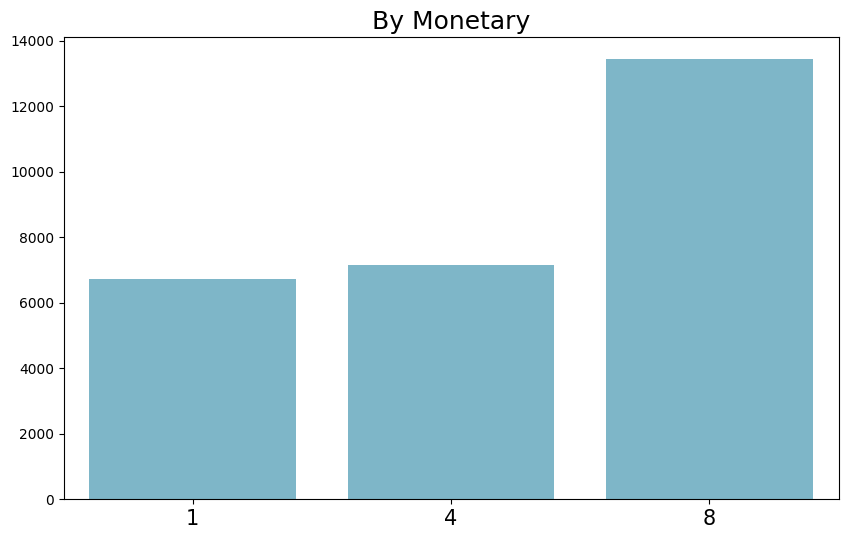

In [87]:
plt.figure(figsize=(10, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4"]
sns.barplot(y="monetary", x="frequency", data=price_df.sort_values(by="monetary", ascending=False).head(3), palette=colors)
plt.ylabel(None)
plt.xlabel(None)
plt.title("By Monetary", loc="center", fontsize=18)
plt.tick_params(axis='x', labelsize=15)

plt.show()

### bagaimana nilai kepuasan pelanggan setelah melakukan transaksi ?

In [88]:
reviews_df.head(1)

,review_id,order_id,review_score,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 21:46:59


In [89]:
all_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'delivery_time', 'review_id',
       'review_score', 'review_answer_timestamp'],
      dtype='object')

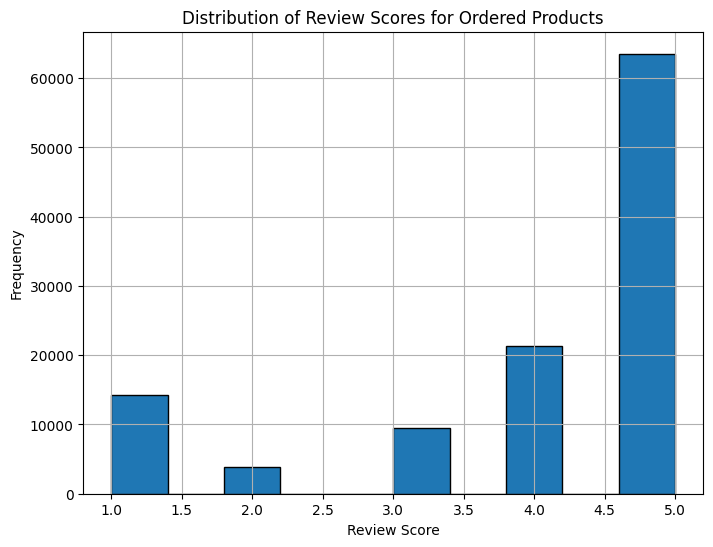

In [90]:
plt.figure(figsize=(8, 6))
plt.hist(all_df['review_score'], bins=10, edgecolor='black')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.title('Distribution of Review Scores for Ordered Products')
plt.grid(True)
plt.show()

### Menyatukan Sekuruh tabel yang diperlukan kedalam `all_df`

In [91]:
all_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'delivery_time', 'review_id',
       'review_score', 'review_answer_timestamp'],
      dtype='object')

In [92]:
all_df = pd.merge(
    left=all_df ,
    right=customers_df,
    how="left",
    left_on = "customer_id",
    right_on= "customer_id"
    # right_on=[["order_id", "order_item_id","seller_id","price", "freight_value"]]
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,...,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,review_id,review_score,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool stuff,650.0,28.0,...,2017-09-20 23:43:48,2017-09-29,1.0,97ca439bc427b48bc1cd7177abe71365,5.0,2017-09-22 10:57:03,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet shop,30000.0,50.0,...,2017-05-12 16:04:24,2017-05-15,8.0,7b07bacd811c4117b742569b04ce3580,4.0,2017-05-15 11:34:13,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis decoracao,3050.0,33.0,...,2018-01-22 13:19:16,2018-02-05,6.0,0c5b33dea94867d1ac402749e5438e8b,5.0,2018-01-23 16:06:31,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,200.0,16.0,...,2018-08-14 13:32:39,2018-08-20,4.0,f4028d019cb58564807486a6aaf33817,4.0,2018-08-15 16:39:01,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas jardim,3750.0,35.0,...,2017-03-01 16:42:31,2017-03-17,13.0,940144190dcba6351888cafa43f3a3a5,5.0,2017-03-03 10:54:59,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP


In [93]:
all_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'delivery_time', 'review_id',
       'review_score', 'review_answer_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state'],
      dtype='object')

In [94]:
all_df.to_csv("all_data.csv", sep=",")

## Kesimpulan

1. **Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?**
  * performa penjualan menurun drastis pada bulan februari dan juni sehinga berpengaruh pada revenue di bulan debruari dan juni. nnamun terjadi peningkatan penjualan dan revenue pada bulan maret yang cukup signifikan.

2. **Bagaimana demografi Pelanggan yang dimiliki ?**
 * Kota sao paulo memiliki pelanggan terbanyak sebesar 15.63% pelanggan berasal dari sao paulo. pada urutan kedua dan ketiga ditempati oleh  rio de janeiro dan belo horizante dengan rasio sebezsaar 6.92% dan 2.79%.
 Serta negara bagian yang paling banyak memiliki pelanggan adalah SP atau Sao Paoulo state dengan jumlah >4000 pelanggan.
3. **kategori produk apa yang paling banyak dan paling sedikit terjual?**
  * kategori produk yang paling banyak terjual adalah cama mesa banho dan yang paling sedikit adalah seguros e servicos
4. **Berapa banyak uang yang dihabiskan pelanggan ?**
  * nominal paling besar yang dihabiskan oleh pelanggan yaitu sebesar 13440
5. **bagaimana nilai kepuasan pelanggan setelah melakukan transaksi ?**
  * bila dilihat dari persebaran nilai kepuasan pelanggan menunjukan hasil yang positif dimana sebagian besar dari pelnggan memberikan penilai > 4.5 yang menunjukan bahwa pelanggan puas terhadap transaksi yang merka lakukan.
